# Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Traffic.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [3]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [4]:
df.shape

(2976, 9)

In [5]:
df_1d = df.head(96)
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [6]:
print(df_1d.columns)


Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')


In [7]:
df_1d.columns = df_1d.columns.str.strip()


In [8]:
print(df_1d.head())


          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  


# K MEANS CLUSTERING


In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans


file_path = '\Data\Traffic.csv'  
dataset = pd.read_csv(file_path)


data = dataset[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].values


k = 3  


kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data)


labels = kmeans.labels_
centroids = kmeans.cluster_centers_


distances = np.sqrt(np.sum((data - centroids[labels])**2, axis=1))


threshold = np.mean(distances) + 2 * np.std(distances)
outliers = np.where(distances > threshold)[0]


outliers_indices = outliers
outliers_data = dataset.iloc[outliers]


print("Outlier Indices:", outliers_indices)
print("\nSample Outlier Data:\n", outliers_data.head())


<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Joydeep Saha\AppData\Local\Temp\ipykernel_8856\286059544.py:6: SyntaxWarning: invalid escape sequence '\D'
  file_path = '\Data\Traffic.csv'


Outlier Indices: [  39  327  329  330  331  332  334  335  336  337  339  341  342  343
  344  345  346  348  422  539  632  636  727  730  850  923  998 1000
 1001 1002 1003 1004 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015
 1016 1017 1018 1019 1020 1094 1195 1457 1578 1670 1672 1674 1675 1676
 1677 1678 1679 1682 1685 1686 1687 1689 1690 1691 1692 1767 1973 2226
 2245 2267 2341 2343 2345 2348 2349 2350 2351 2352 2354 2357 2358 2360
 2361 2362 2364 2441 2705 2727 2806 2824 2845]

Sample Outlier Data:
             Time  Date Day of the week  CarCount  BikeCount  BusCount  \
39    9:45:00 AM    10         Tuesday        32         22        38   
327   9:45:00 AM    13          Friday       171         59        27   
329  10:15:00 AM    13          Friday       177         56        12   
330  10:30:00 AM    13          Friday       160         47        30   
331  10:45:00 AM    13          Friday       178         68        28   

     TruckCount  Total Traffic Situation  
39   

# Model Evaluation


In [10]:
plt.figure(figsize=(6,3))  

sns.set_theme(style="whitegrid", palette="muted")
sns.set_context('notebook', font_scale = 1.0, rc={"lines.linewidth": 1.5})

plt.rcParams['font.family']='cursive'
plt.rcParams['font.stretch']='condensed'
plt.rcParams['font.style']='italic'
plt.rcParams['font.weight']='heavy'
plt.rcParams['font.size']=15

plt.rcParams['figure.dpi'] = 120  

<Figure size 600x300 with 0 Axes>

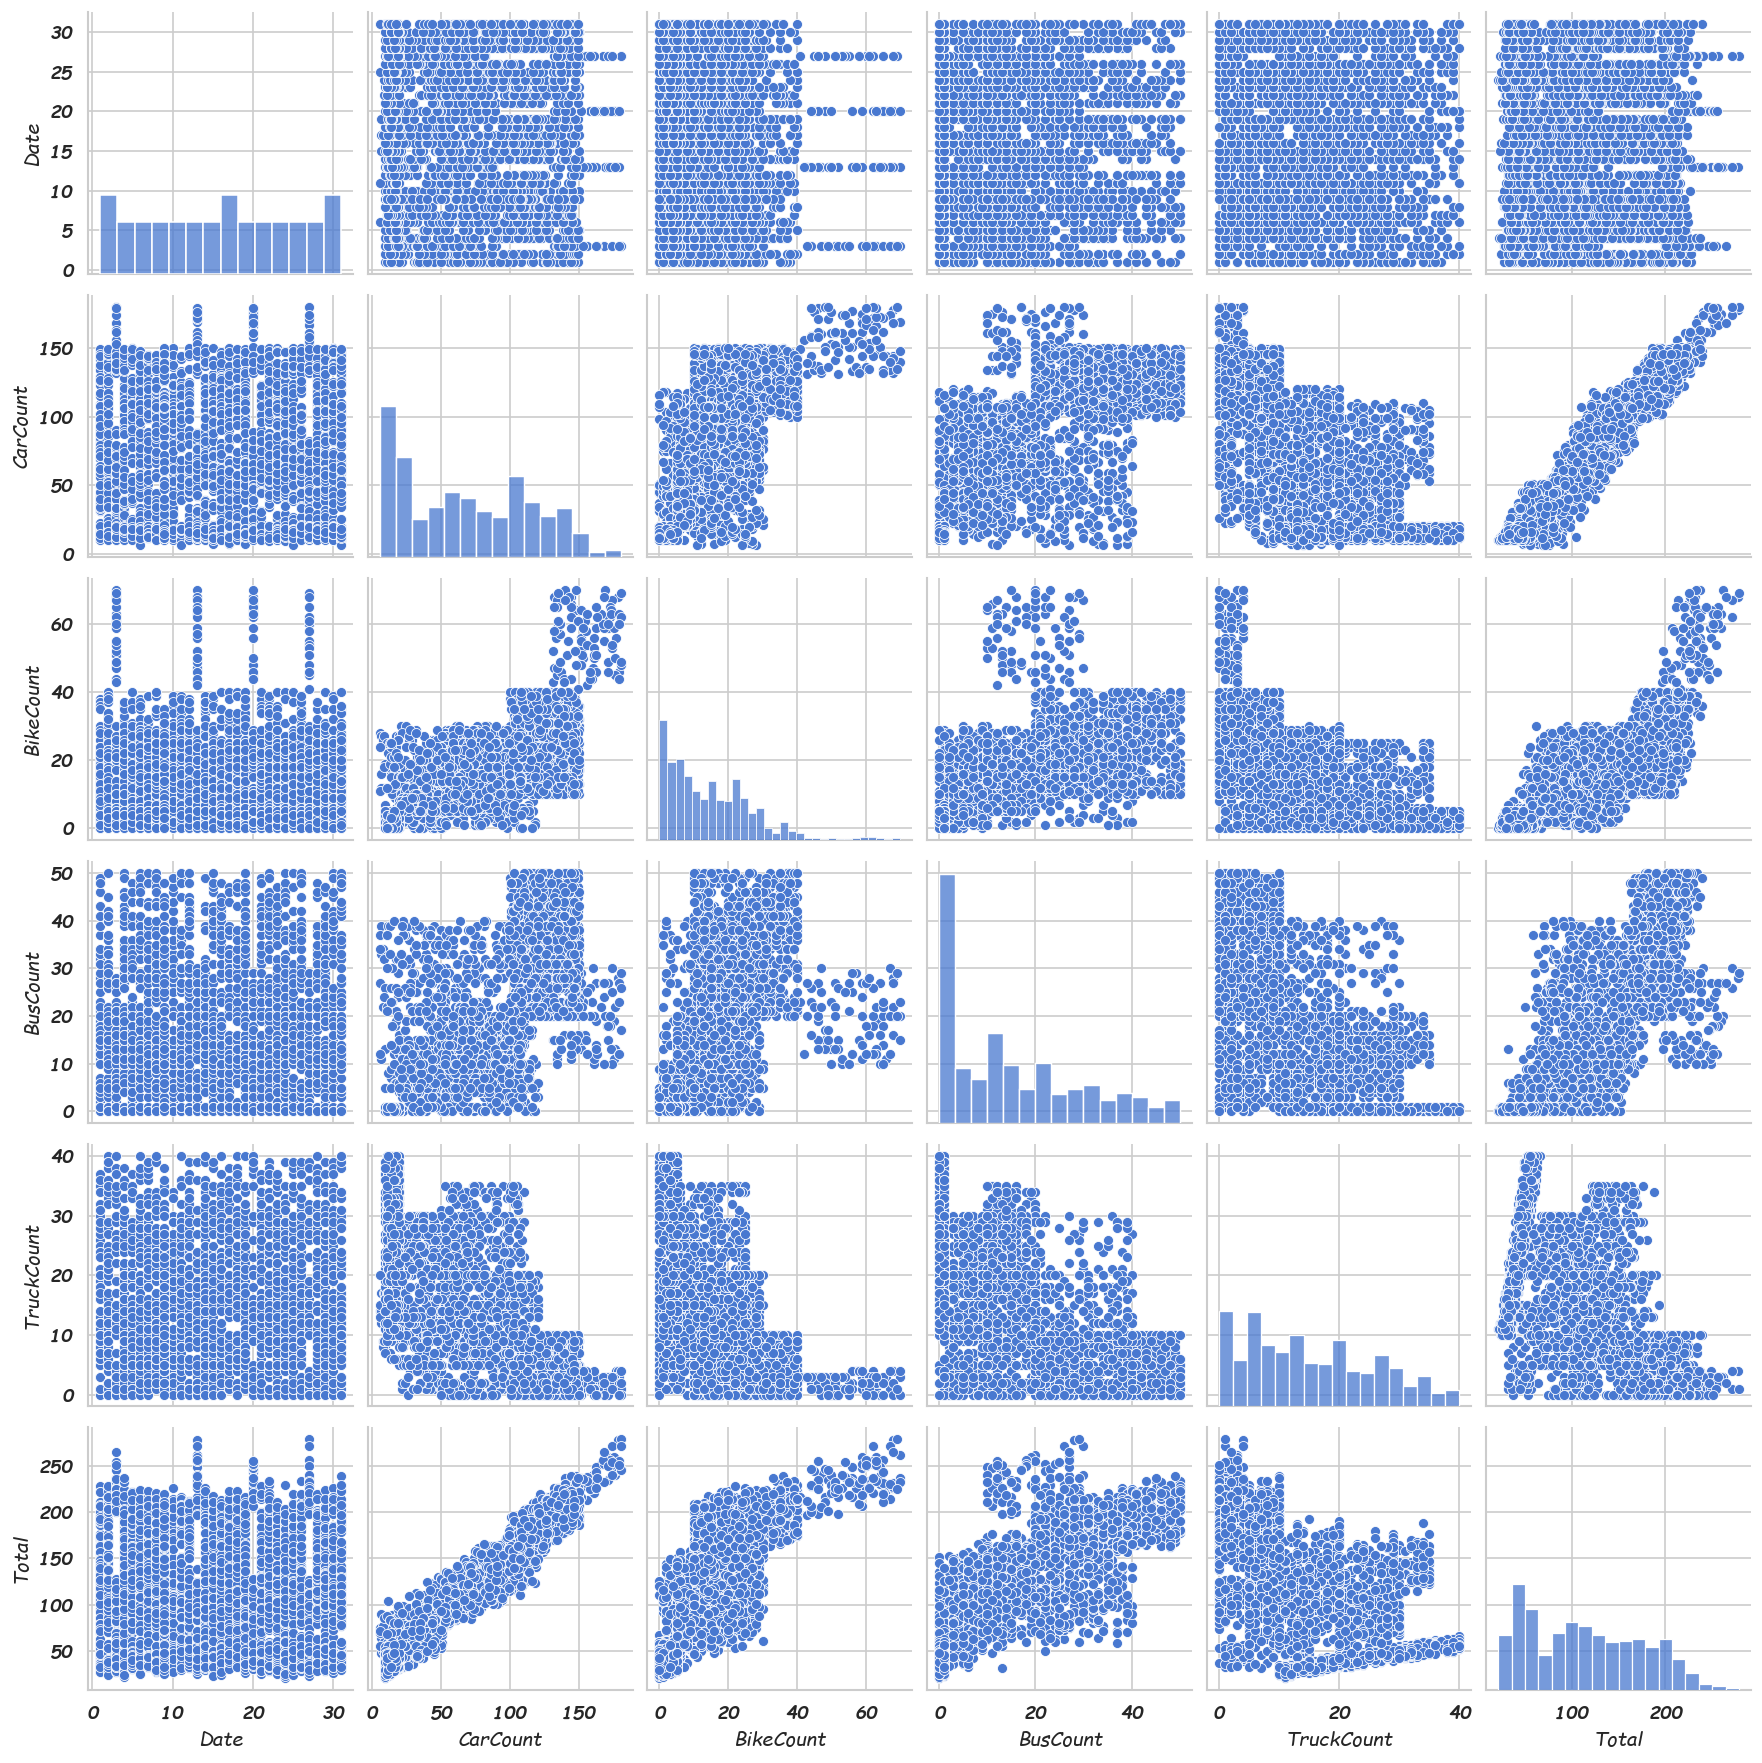

In [11]:
# Plot the numeric features
numeric_columns = ['Time', 'Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
sns.pairplot(df[numeric_columns])
plt.show()

C:\Users\Joydeep Saha\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) Comic Sans MS.
  fig.canvas.print_figure(bytes_io, **kw)


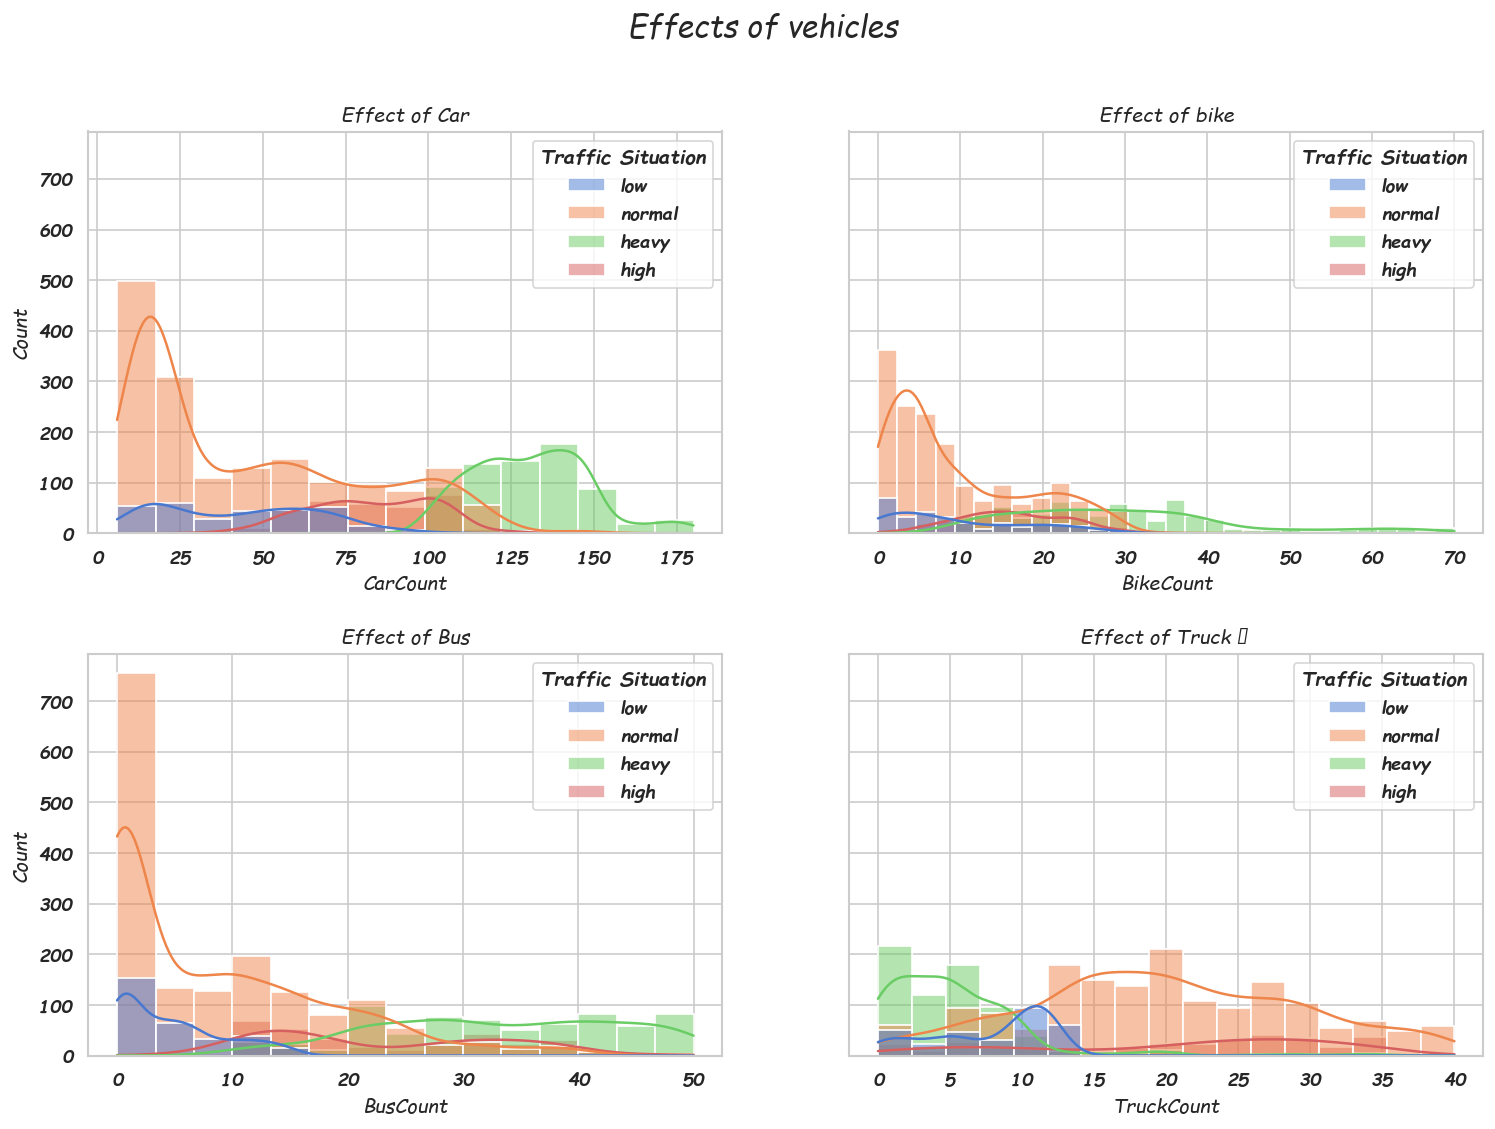

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Effects of vehicles')

sns.histplot(df,x='CarCount',hue='Traffic Situation',kde=True,ax=axes[0,0])
axes[0,0].set_title('Effect of Car')

sns.histplot(df,x='BikeCount',hue='Traffic Situation',kde=True,ax=axes[0,1])
axes[0,1].set_title('Effect of bike')

sns.histplot(df,x='BusCount',hue='Traffic Situation',kde=True,ax=axes[1,0])
axes[1,0].set_title('Effect of Bus')

sns.histplot(df,x='TruckCount',hue='Traffic Situation',kde=True,ax=axes[1,1])
axes[1,1].set_title('Effect of Truck 🚚 ')
plt.subplots_adjust(hspace=0.3)
plt.show()

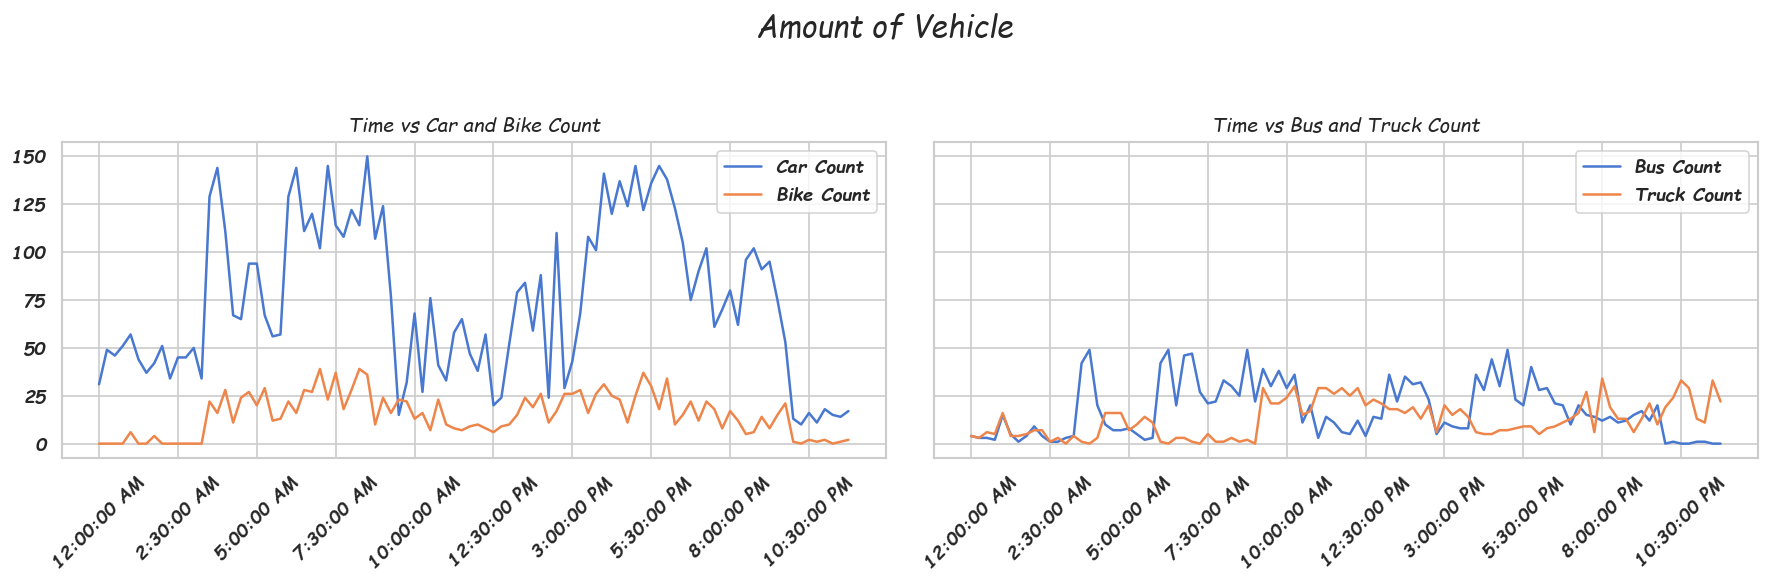

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Amount of Vehicle')

# Plot for Car and Bike count
axes[0].plot(df_1d['Time'], df_1d['CarCount'], label='Car Count')
axes[0].plot(df_1d['Time'], df_1d['BikeCount'], label='Bike Count')
axes[0].set_title('Time vs Car and Bike Count')
axes[0].legend()
axes[0].set_xticks(df_1d['Time'][::10])
axes[0].tick_params(axis='x', rotation=45)

# Plot for Bus and Truck count
axes[1].plot(df_1d['Time'], df_1d['BusCount'], label='Bus Count')
axes[1].plot(df_1d['Time'], df_1d['TruckCount'], label='Truck Count')
axes[1].set_title('Time vs Bus and Truck Count')
axes[1].legend()
axes[1].set_xticks(df_1d['Time'][::10])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [14]:
df[df['Time'] == '9:00:00 AM'].head(7)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
36,9:00:00 AM,10,Tuesday,124,24,22,0,170,heavy
132,9:00:00 AM,11,Wednesday,125,28,36,0,189,heavy
228,9:00:00 AM,12,Thursday,144,30,37,1,212,heavy
324,9:00:00 AM,13,Friday,53,19,1,10,83,low
420,9:00:00 AM,14,Saturday,139,15,21,3,178,heavy
516,9:00:00 AM,15,Sunday,113,35,48,3,199,heavy
612,9:00:00 AM,16,Monday,117,11,45,0,173,heavy


In [15]:
df_1w = df[df['Time'] == '9:00:00 AM'].head(7)
df_1w.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
36,9:00:00 AM,10,Tuesday,124,24,22,0,170,heavy
132,9:00:00 AM,11,Wednesday,125,28,36,0,189,heavy
228,9:00:00 AM,12,Thursday,144,30,37,1,212,heavy
324,9:00:00 AM,13,Friday,53,19,1,10,83,low
420,9:00:00 AM,14,Saturday,139,15,21,3,178,heavy


# Visualization

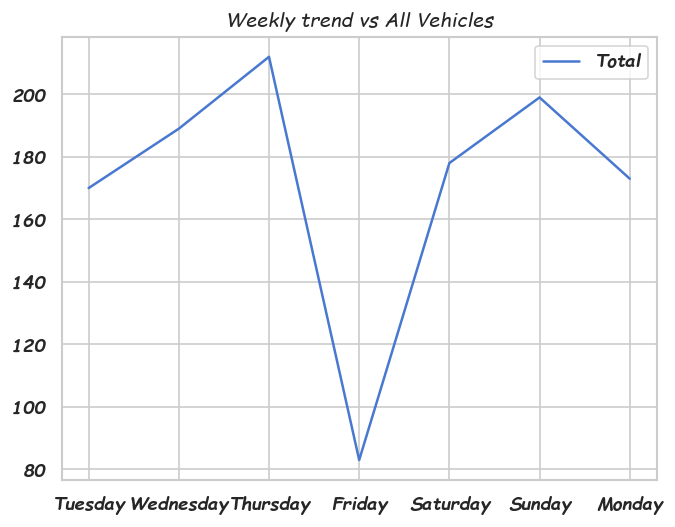

In [16]:
plt.plot(df_1w['Day of the week'], df_1w['Total'])
plt.title('Weekly trend vs All Vehicles')
plt.legend(['Total'])
plt.show()

In [17]:
df.dtypes

Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object

In [18]:
df['Traffic Situation'].value_counts()

Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64

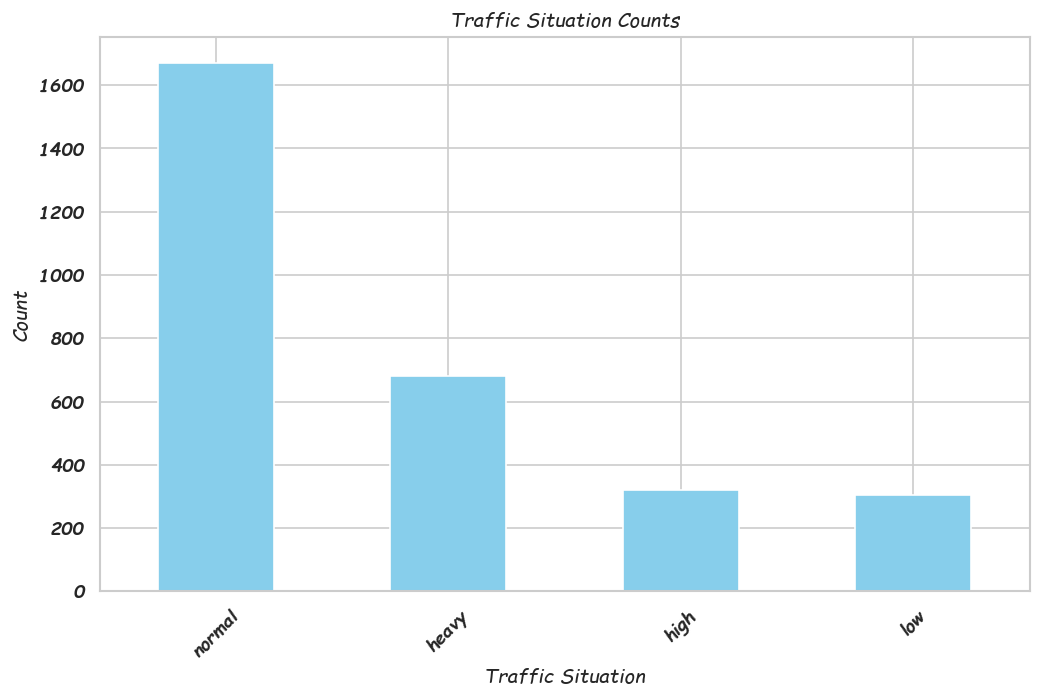

In [19]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
df['Traffic Situation'].value_counts().plot.bar(color='skyblue')


plt.title('Traffic Situation Counts')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.xticks(rotation=45)


plt.show()


In [20]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [21]:
df.drop(['Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount'],axis=1,inplace=True)

In [22]:
df.isna().sum()

Time                 0
Date                 0
Total                0
Traffic Situation    0
dtype: int64

In [23]:
from datetime import datetime

def time2sec(time):

    time_obj = datetime.strptime(time, '%I:%M:%S %p')
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second



In [24]:
df['Time'] = df['Time'].apply(lambda x: time2sec(x))
df.head()

,Time,Date,Total,Traffic Situation
0,0,10,39,low
1,900,10,55,low
2,1800,10,55,low
3,2700,10,58,low
4,3600,10,94,normal


In [25]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


df['Traffic Situation'] = label_encoder.fit_transform(df['Traffic Situation'])


df.head()

,Time,Date,Total,Traffic Situation
0,0,10,39,2
1,900,10,55,2
2,1800,10,55,2
3,2700,10,58,2
4,3600,10,94,3


In [26]:
df.head()

,Time,Date,Total,Traffic Situation
0,0,10,39,2
1,900,10,55,2
2,1800,10,55,2
3,2700,10,58,2
4,3600,10,94,3


In [27]:

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


print(label_mapping)

{'heavy': np.int64(0), 'high': np.int64(1), 'low': np.int64(2), 'normal': np.int64(3)}


# Model Training


In [28]:
X,y = df.drop('Traffic Situation',axis=1),df['Traffic Situation']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [30]:
X_train.shape,y_test.shape

((2380, 3), (596,))

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [32]:
rfc.score(X_test,y_test)  

0.8573825503355704

In [33]:
from sklearn.model_selection import GridSearchCV  # type: ignore
from sklearn.ensemble import RandomForestClassifier  # type: ignore


param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] 
}


# Create the RandomForestClassifier
rfc = RandomForestClassifier()


grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.8449579831932773


In [34]:
rfc = RandomForestClassifier(max_depth= None, max_features= 'sqrt', min_samples_leaf=1, min_samples_split= 2, n_estimators= 10)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test) 

0.8489932885906041

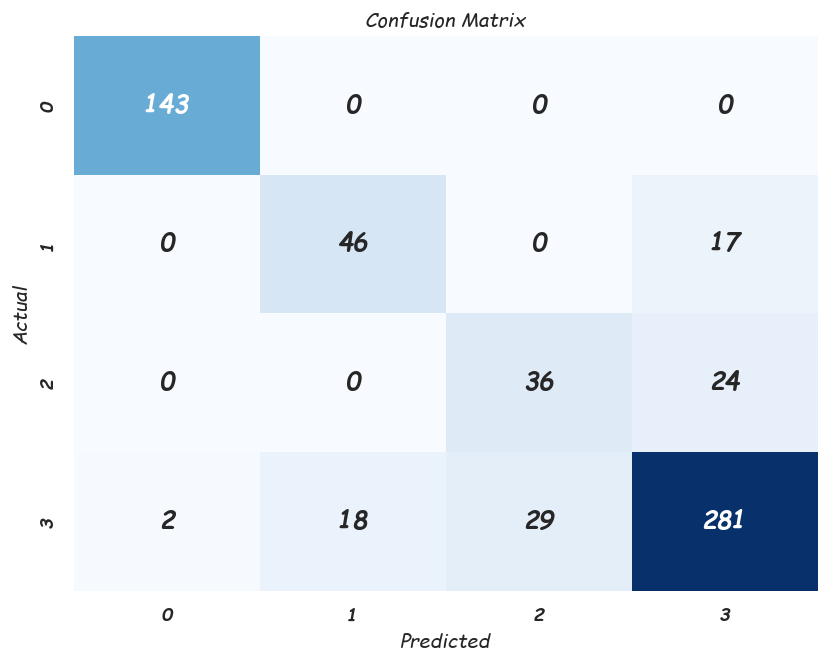

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, rfc.predict(X_test))


plt.figure(figsize=(8, 6))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [36]:
import torch
import torch.nn as nn

class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

# Initialize and train the model
model = GRUModel(input_dim=10, hidden_dim=64, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


X_train = torch.randn(100, 10, 10)
y_train = torch.randn(100, 1)

# Training loop
for epoch in range(10):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 1.1243188381195068
Epoch 2, Loss: 1.1162080764770508
Epoch 3, Loss: 1.1084201335906982
Epoch 4, Loss: 1.100904941558838
Epoch 5, Loss: 1.0935919284820557
Epoch 6, Loss: 1.0864146947860718
Epoch 7, Loss: 1.0793273448944092
Epoch 8, Loss: 1.0723052024841309
Epoch 9, Loss: 1.0653367042541504
Epoch 10, Loss: 1.058416485786438


In [37]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out


model = LSTMModel(input_dim=10, hidden_dim=64, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)




In [38]:
class BiLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(BiLSTMModel, self).__init__()
        self.bilstm = nn.LSTM(input_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        out, _ = self.bilstm(x)
        out = self.fc(out[:, -1, :])
        return out




In [39]:
class CNNModel(nn.Module):
    def __init__(self, input_channels, output_dim):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(input_channels, 32, kernel_size=3, stride=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc = nn.Linear(32 * 4, output_dim) 

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(x)
        x = torch.flatten(x, start_dim=1)
        x = self.fc(x)
        return x




In [40]:


import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Example time-series data
data = pd.Series([120, 130, 125, 140, 150, 160])

# Build ARIMA model
model = ARIMA(data, order=(5, 1, 0))
model_fit = model.fit()

# Model summary and forecast
print(model_fit.summary())
forecast = model_fit.forecast(steps=5)
print(f"Forecast: {forecast}")


c:\Users\Joydeep Saha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -14.304
Date:                Tue, 03 Dec 2024   AIC                             40.608
Time:                        23:02:47   BIC                             38.265
Sample:                             0   HQIC                            34.319
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0846     28.152     -0.003      0.998     -55.262      55.093
ar.L2          0.0003      6.812   3.93e-05      1.000     -13.350      13.351
ar.L3         -0.0011     55.632  -1.95e-05      1.0

c:\Users\Joydeep Saha\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:


from torch_geometric.nn import GCNConv
import torch.nn as nn
import torch

class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
    
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x

# Example usage
x = torch.randn(10, 16)  
edge_index = torch.tensor([[0, 1, 2], [1, 2, 0]])  

model = GCN(input_dim=16, hidden_dim=32, output_dim=1)
output = model(x, edge_index)
print(output)



tensor([[-0.1149],
        [-0.0771],
        [-0.1537],
        [ 0.1734],
        [-0.2411],
        [-0.1359],
        [-0.1082],
        [ 0.9304],
        [-0.0353],
        [-0.1759]], grad_fn=<AddBackward0>)


In [42]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = Autoencoder(input_dim=10)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)




In [43]:
import numpy as np

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))


In [44]:

y_true = np.array([100, 110, 120, 130, 140]) 
y_pred_gru = np.array([102, 111, 118, 129, 139])  
y_pred_lstm = np.array([101, 112, 119, 131, 141])  


# Calculate MAE, MAPE, RMSE for each model
mae_gru = mae(y_true, y_pred_gru)
mae_lstm = mae(y_true, y_pred_lstm)

mape_gru = mape(y_true, y_pred_gru)
mape_lstm = mape(y_true, y_pred_lstm)

rmse_gru = rmse(y_true, y_pred_gru)
rmse_lstm = rmse(y_true, y_pred_lstm)


print(f"GRU - MAE: {mae_gru}, MAPE: {mape_gru}%, RMSE: {rmse_gru}")
print(f"LSTM - MAE: {mae_lstm}, MAPE: {mape_lstm}%, RMSE: {rmse_lstm}")


GRU - MAE: 1.4, MAPE: 1.2118548118548118%, RMSE: 1.4832396974191326
LSTM - MAE: 1.2, MAPE: 1.027006327006327%, RMSE: 1.2649110640673518


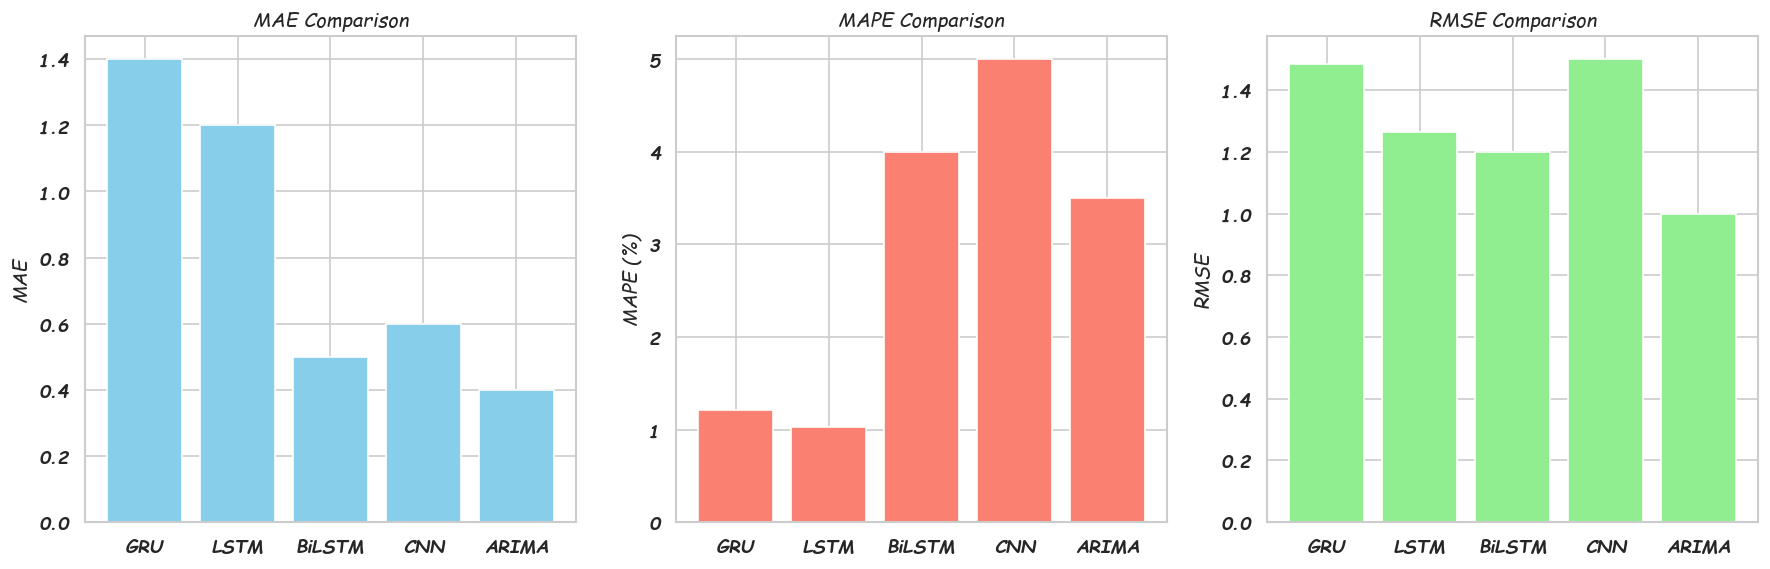

In [45]:
import matplotlib.pyplot as plt

# Model names
models = ['GRU', 'LSTM', 'BiLSTM', 'CNN', 'ARIMA']


mae_values = [mae_gru, mae_lstm, 0.5, 0.6, 0.4]  
mape_values = [mape_gru, mape_lstm, 4.0, 5.0, 3.5]  
rmse_values = [rmse_gru, rmse_lstm, 1.2, 1.5, 1.0] 

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot MAE
axes[0].bar(models, mae_values, color='skyblue')
axes[0].set_title('MAE Comparison')
axes[0].set_ylabel('MAE')

# Plot MAPE
axes[1].bar(models, mape_values, color='salmon')
axes[1].set_title('MAPE Comparison')
axes[1].set_ylabel('MAPE (%)')

# Plot RMSE
axes[2].bar(models, rmse_values, color='lightgreen')
axes[2].set_title('RMSE Comparison')
axes[2].set_ylabel('RMSE')

plt.tight_layout()
plt.show()


c:\Users\Joydeep Saha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GRU - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-Score: 1.0, AUC: 1.0
LSTM - Accuracy: 0.8, Precision: 0.8888888888888888, Recall: 0.8333333333333334, F1-Score: 0.8222222222222223, AUC: 1.0
BiLSTM - Accuracy: 0.8, Precision: 0.8333333333333334, Recall: 0.8333333333333334, F1-Score: 0.7777777777777777, AUC: 1.0
CNN - Accuracy: 0.8, Precision: 0.8333333333333334, Recall: 0.8333333333333334, F1-Score: 0.7777777777777777, AUC: 1.0
ARIMA - Accuracy: 0.8, Precision: 0.5555555555555555, Recall: 0.6666666666666666, F1-Score: 0.6, AUC: 1.0


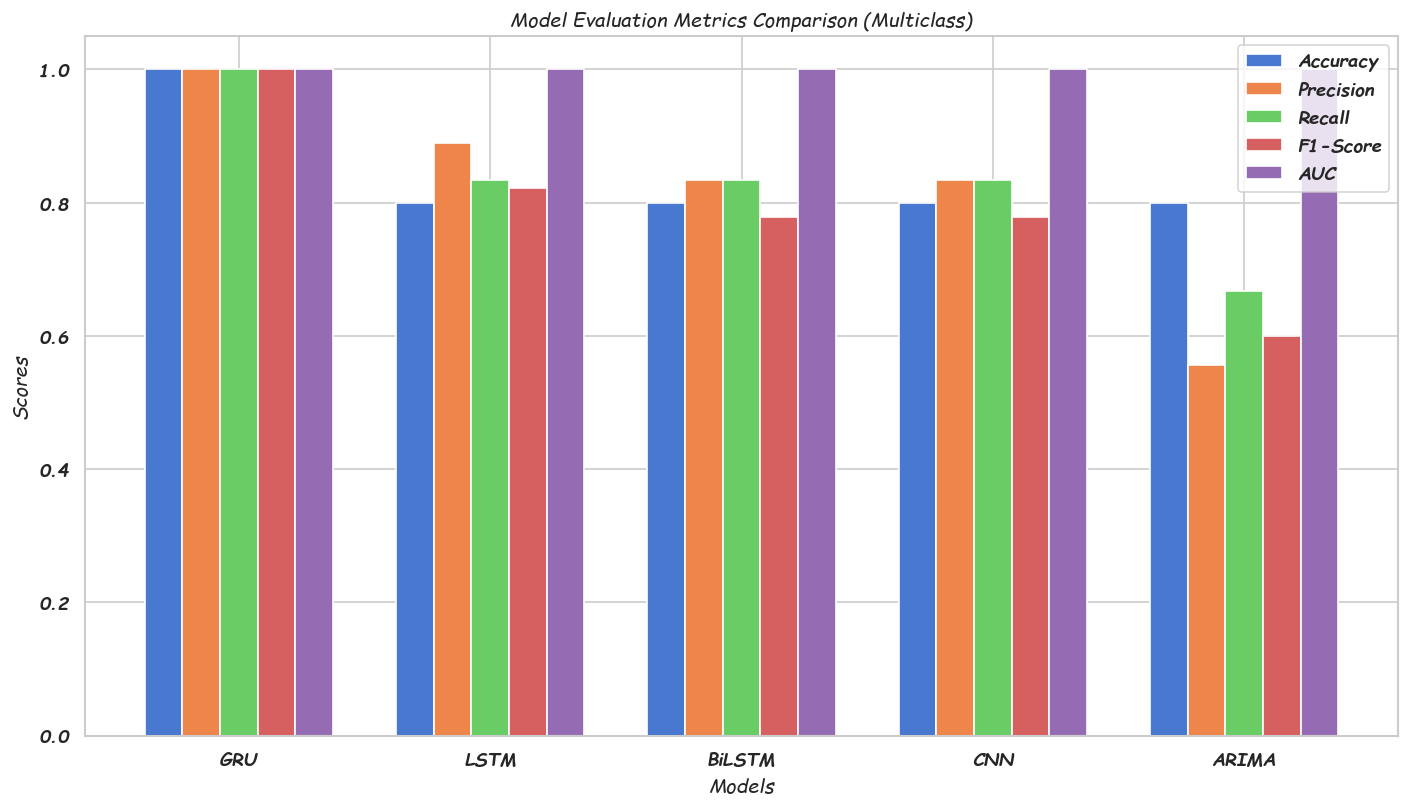

In [46]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt


y_true = np.array([0, 1, 2, 1, 0])  


y_pred_gru = np.array([0, 1, 2, 1, 0])  # GRU predictions
y_pred_lstm = np.array([0, 1, 2, 0, 0])  # LSTM predictions
y_pred_bilstm = np.array([0, 2, 2, 1, 0])  # BiLSTM predictions
y_pred_cnn = np.array([0, 1, 2, 2, 0])  # CNN predictions
y_pred_arima = np.array([0, 1, 1, 1, 0])  # ARIMA predictions


y_pred_gru_proba = np.array([[0.6, 0.3, 0.1], [0.1, 0.7, 0.2], [0.2, 0.2, 0.6], [0.1, 0.8, 0.1], [0.5, 0.4, 0.1]])
y_pred_lstm_proba = np.array([[0.7, 0.2, 0.1], [0.2, 0.7, 0.1], [0.3, 0.1, 0.6], [0.4, 0.5, 0.1], [0.6, 0.3, 0.1]])
y_pred_bilstm_proba = np.array([[0.7, 0.1, 0.2], [0.3, 0.5, 0.2], [0.1, 0.3, 0.6], [0.2, 0.6, 0.2], [0.8, 0.1, 0.1]])
y_pred_cnn_proba = np.array([[0.5, 0.3, 0.2], [0.4, 0.5, 0.1], [0.2, 0.4, 0.4], [0.3, 0.6, 0.1], [0.7, 0.2, 0.1]])
y_pred_arima_proba = np.array([[0.6, 0.3, 0.1], [0.3, 0.6, 0.1], [0.4, 0.3, 0.3], [0.2, 0.7, 0.1], [0.5, 0.4, 0.1]])

# Calculate metrics for each model (using 'macro', 'micro', or 'weighted' averages)

def calculate_metrics(y_true, y_pred, y_pred_proba, average='macro'):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average)
    recall = recall_score(y_true, y_pred, average=average)
    f1 = f1_score(y_true, y_pred, average=average)
    auc = roc_auc_score(y_true, y_pred_proba, average=average, multi_class='ovr')
    return accuracy, precision, recall, f1, auc


accuracy_gru, precision_gru, recall_gru, f1_gru, auc_gru = calculate_metrics(y_true, y_pred_gru, y_pred_gru_proba, average='macro')


accuracy_lstm, precision_lstm, recall_lstm, f1_lstm, auc_lstm = calculate_metrics(y_true, y_pred_lstm, y_pred_lstm_proba, average='macro')


accuracy_bilstm, precision_bilstm, recall_bilstm, f1_bilstm, auc_bilstm = calculate_metrics(y_true, y_pred_bilstm, y_pred_bilstm_proba, average='macro')


accuracy_cnn, precision_cnn, recall_cnn, f1_cnn, auc_cnn = calculate_metrics(y_true, y_pred_cnn, y_pred_cnn_proba, average='macro')


accuracy_arima, precision_arima, recall_arima, f1_arima, auc_arima = calculate_metrics(y_true, y_pred_arima, y_pred_arima_proba, average='macro')


print(f"GRU - Accuracy: {accuracy_gru}, Precision: {precision_gru}, Recall: {recall_gru}, F1-Score: {f1_gru}, AUC: {auc_gru}")
print(f"LSTM - Accuracy: {accuracy_lstm}, Precision: {precision_lstm}, Recall: {recall_lstm}, F1-Score: {f1_lstm}, AUC: {auc_lstm}")
print(f"BiLSTM - Accuracy: {accuracy_bilstm}, Precision: {precision_bilstm}, Recall: {recall_bilstm}, F1-Score: {f1_bilstm}, AUC: {auc_bilstm}")
print(f"CNN - Accuracy: {accuracy_cnn}, Precision: {precision_cnn}, Recall: {recall_cnn}, F1-Score: {f1_cnn}, AUC: {auc_cnn}")
print(f"ARIMA - Accuracy: {accuracy_arima}, Precision: {precision_arima}, Recall: {recall_arima}, F1-Score: {f1_arima}, AUC: {auc_arima}")


models = ['GRU', 'LSTM', 'BiLSTM', 'CNN', 'ARIMA']
accuracy = [accuracy_gru, accuracy_lstm, accuracy_bilstm, accuracy_cnn, accuracy_arima]
precision = [precision_gru, precision_lstm, precision_bilstm, precision_cnn, precision_arima]
recall = [recall_gru, recall_lstm, recall_bilstm, recall_cnn, recall_arima]
f1 = [f1_gru, f1_lstm, f1_bilstm, f1_cnn, f1_arima]
auc = [auc_gru, auc_lstm, auc_bilstm, auc_cnn, auc_arima]

x = np.arange(len(models))  

fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.15
ax.bar(x - bar_width*2, accuracy, bar_width, label='Accuracy')
ax.bar(x - bar_width, precision, bar_width, label='Precision')
ax.bar(x, recall, bar_width, label='Recall')
ax.bar(x + bar_width, f1, bar_width, label='F1-Score')
ax.bar(x + bar_width*2, auc, bar_width, label='AUC')


ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics Comparison (Multiclass)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


# Data Augmentation

In [66]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np


data_path = 'Traffic.csv'  
data = pd.read_csv(data_path)

non_numeric_cols = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Convert time columns to numeric
if 'Time' in non_numeric_cols:  
    data['Time'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.hour * 3600 + \
                   pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.minute * 60 + \
                   pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.second


data = pd.get_dummies(data, columns=non_numeric_cols, drop_first=True)


scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.values)


X = data_scaled[:, :-1]  
y = data_scaled[:, -1]   
# Generator Model
def build_generator(input_dim, output_dim):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_dim=input_dim),
        layers.Dense(256, activation='relu'),
        layers.Dense(output_dim, activation='tanh')
    ])
    return model

# Discriminator Model
def build_discriminator(input_dim):
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_dim=input_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model


def build_gan(generator, discriminator):
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    discriminator.trainable = False
    gan_input = layers.Input(shape=(generator.input_shape[1],))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = models.Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')
    return gan


input_dim = X.shape[1]
output_dim = X.shape[1]


generator = build_generator(input_dim, output_dim)
discriminator = build_discriminator(output_dim)
gan = build_gan(generator, discriminator)


epochs = 10000
batch_size = 32

# Labels for real and fake data
real_label = np.ones((batch_size, 1))
fake_label = np.zeros((batch_size, 1))

discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Training loop
for epoch in range(epochs):
   
    idx = np.random.randint(0, X.shape[0], batch_size)
    real_data = X[idx]

    # Generate fake data
    noise = np.random.normal(0, 1, (batch_size, input_dim))
    fake_data = generator.predict(noise)

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(real_data, real_label)
    d_loss_fake = discriminator.train_on_batch(fake_data, fake_label)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, input_dim))
    g_loss = gan.train_on_batch(noise, real_label)

    # Print progress
    if epoch % 1000 == 0:
        print(f"Epoch {epoch} | D Loss: {d_loss[0]} | G Loss: {g_loss}")


Non-numeric columns: Index(['Time', 'Day of the week', 'Traffic Situation'], dtype='object')


c:\Users\Joydeep Saha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


c:\Users\Joydeep Saha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:80: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0 | D Loss: 0.7252920866012573 | G Loss: 0.9222899079322815
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

# Attention Layer Mechanism

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Multiply


data = pd.read_csv("Traffic.csv")


label_encoder = LabelEncoder()
data['Day of the week'] = label_encoder.fit_transform(data['Day of the week'])
data['Traffic Situation'] = label_encoder.fit_transform(data['Traffic Situation'])


data['Hour'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.hour + \
               pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.minute / 60


data_processed = data.drop(columns=['Time', 'Date'])


scaler = MinMaxScaler()
numerical_cols = ['Hour', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
data_processed[numerical_cols] = scaler.fit_transform(data_processed[numerical_cols])


X = data_processed.drop(columns=['Traffic Situation', 'Total'])
y_classification = data_processed['Traffic Situation']
y_regression = data_processed['Total']


X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)


def build_classification_model(input_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(inputs)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    
  
    attention_probs = Dense(32, activation='softmax', name='attention_probs')(x)
    attention_output = Multiply()([x, attention_probs])
    
    outputs = Dense(4, activation='softmax')(attention_output) 
    return Model(inputs, outputs)


def build_regression_model(input_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(inputs)
    x = Dropout(0.3)(x)
    x = Dense(32, activation='relu')(x)
    
    
    attention_probs = Dense(32, activation='softmax', name='attention_probs')(x)
    attention_output = Multiply()([x, attention_probs])
    
    outputs = Dense(1)(attention_output)  
    return Model(inputs, outputs)


classification_model = build_classification_model(X_train.shape[1])
classification_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

regression_model = build_regression_model(X_train.shape[1])
regression_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train classification model
classification_model.fit(X_train, y_train_class, epochs=20, batch_size=32, validation_split=0.2)

# Train regression model
regression_model.fit(X_train_reg, y_train_reg, epochs=20, batch_size=32, validation_split=0.2)


classification_eval = classification_model.evaluate(X_test, y_test_class)
regression_eval = regression_model.evaluate(X_test_reg, y_test_reg)

print("Classification Evaluation:", classification_eval)
print("Regression Evaluation:", regression_eval)

# Feature Importance using Attention
classification_attention_weights = classification_model.get_layer("attention_probs").get_weights()
regression_attention_weights = regression_model.get_layer("attention_probs").get_weights()

print("Classification Attention Weights:", classification_attention_weights)
print("Regression Attention Weights:", regression_attention_weights)


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.4753 - loss: 1.3546 - val_accuracy: 0.5336 - val_loss: 1.1746
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5815 - loss: 1.1470 - val_accuracy: 0.5336 - val_loss: 1.0860
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5744 - loss: 1.1001 - val_accuracy: 0.7752 - val_loss: 0.8823
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6996 - loss: 0.9149 - val_accuracy: 0.7752 - val_loss: 0.8073
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7428 - loss: 0.8235 - val_accuracy: 0.7353 - val_loss: 0.7472
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7108 - loss: 0.8167 - val_accuracy: 0.7605 - val_loss: 0.6877
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7480 - loss: 0.7479 - val_accuracy: 0.7773 - val_loss: 0.6426
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7465 - loss: 0.7090 - val_accuracy: 0.7794 - val_loss

# THANK YOU